<a href="https://colab.research.google.com/github/ghommidhWassim/GNN-variants/blob/main/comparaison_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!pip install torchvision
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.6.0+cu124.html


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... canceledERROR: Operation cancelled by user
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 404, in <module>
    _load_global_deps()
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 333, in _load_global_deps
    _preload_cuda_deps("cuda_nvrtc", "libnvrtc.so.*[0-9]")
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 303, in _preload_cuda_deps
    ctypes.CDLL(lib_path)
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
^C
12.4
^C
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.7 MB/s eta 0:00:00
   ━━

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import scipy.sparse as sp
from torch_geometric.datasets import Planetoid, Amazon
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.utils import to_scipy_sparse_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time


ModuleNotFoundError: No module named 'torch_geometric'

**Pubmed dataset**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ------------------- Load Dataset -------------------
def dataset_load():
    print(f"Using device: {device}")
    dataset = Planetoid(root='data/Planetoid', name='PubMed', transform=NormalizeFeatures())
    data = dataset[0].to(device)
    return dataset.num_features, data, dataset.num_classes

num_features, data, num_classes = dataset_load()

Using device: cuda


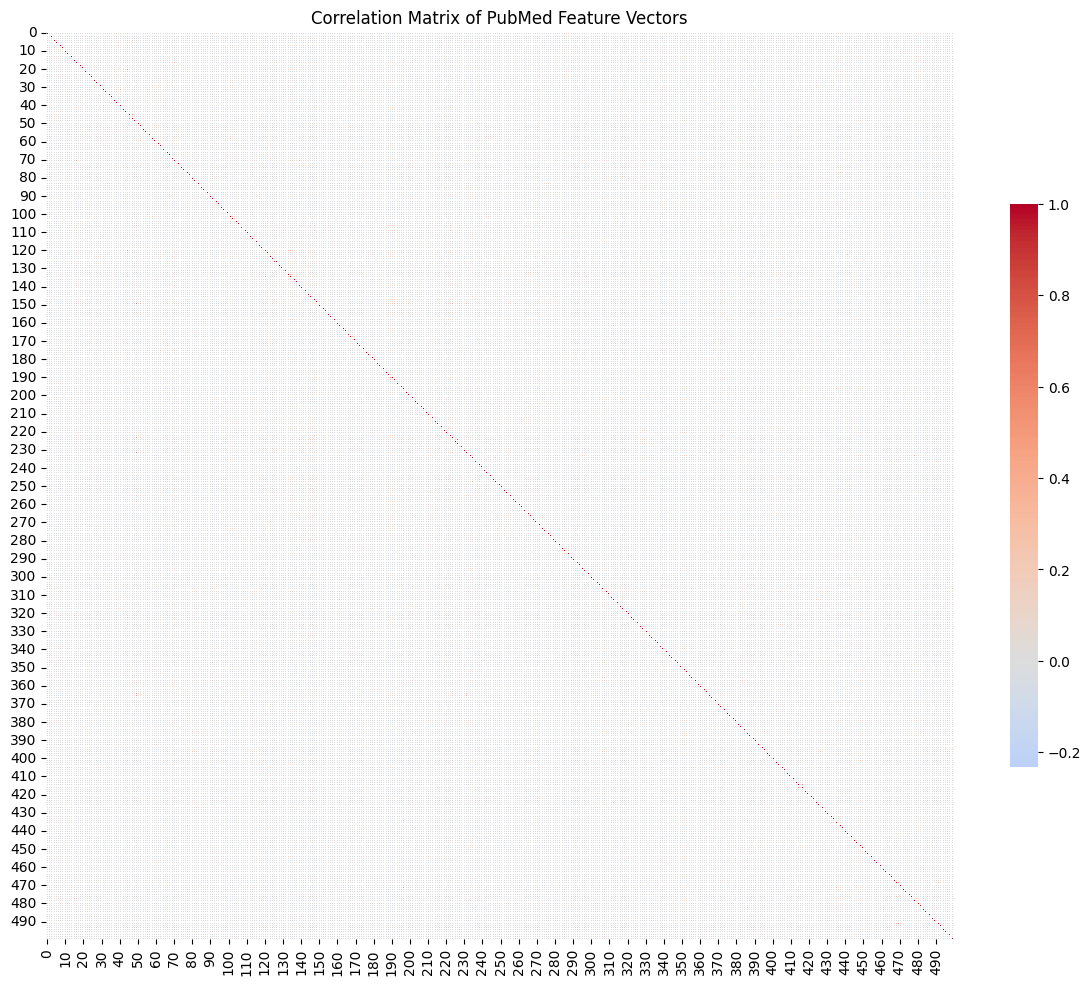

In [ ]:
features = data.x.cpu().numpy()  # Shape: (num_nodes, num_features)
df = pd.DataFrame(features)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .6})
plt.title("Correlation Matrix of PubMed Feature Vectors")
plt.tight_layout()
plt.show()

In [ ]:
df

,0,1
0,-0.027557,0.002643
1,-0.033134,-0.014725
2,0.004786,0.060131
3,0.035066,-0.029098
4,-0.021755,-0.007102
...,...,...
19712,0.012354,-0.000055
19713,-0.013835,0.025441
19714,-0.039720,-0.014130
19715,0.033680,0.052238


In [ ]:
print(corr_matrix)

              0             1
0  1.000000e+00  1.749427e-08
1  1.749427e-08  1.000000e+00


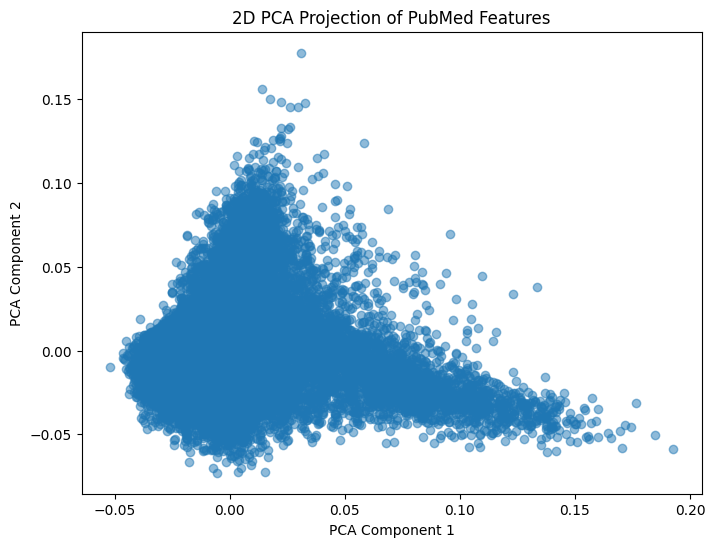

In [ ]:
from sklearn.decomposition import PCA
features = data.x.cpu().numpy()
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Projection of PubMed Features")
plt.show()

In [ ]:
features_pca

array([[-0.0275568 ,  0.00264293],
       [-0.0331345 , -0.01472537],
       [ 0.00478571,  0.06013073],
       ...,
       [-0.03972012, -0.01412951],
       [ 0.03368025,  0.0522384 ],
       [-0.0208267 , -0.01416523]], dtype=float32)

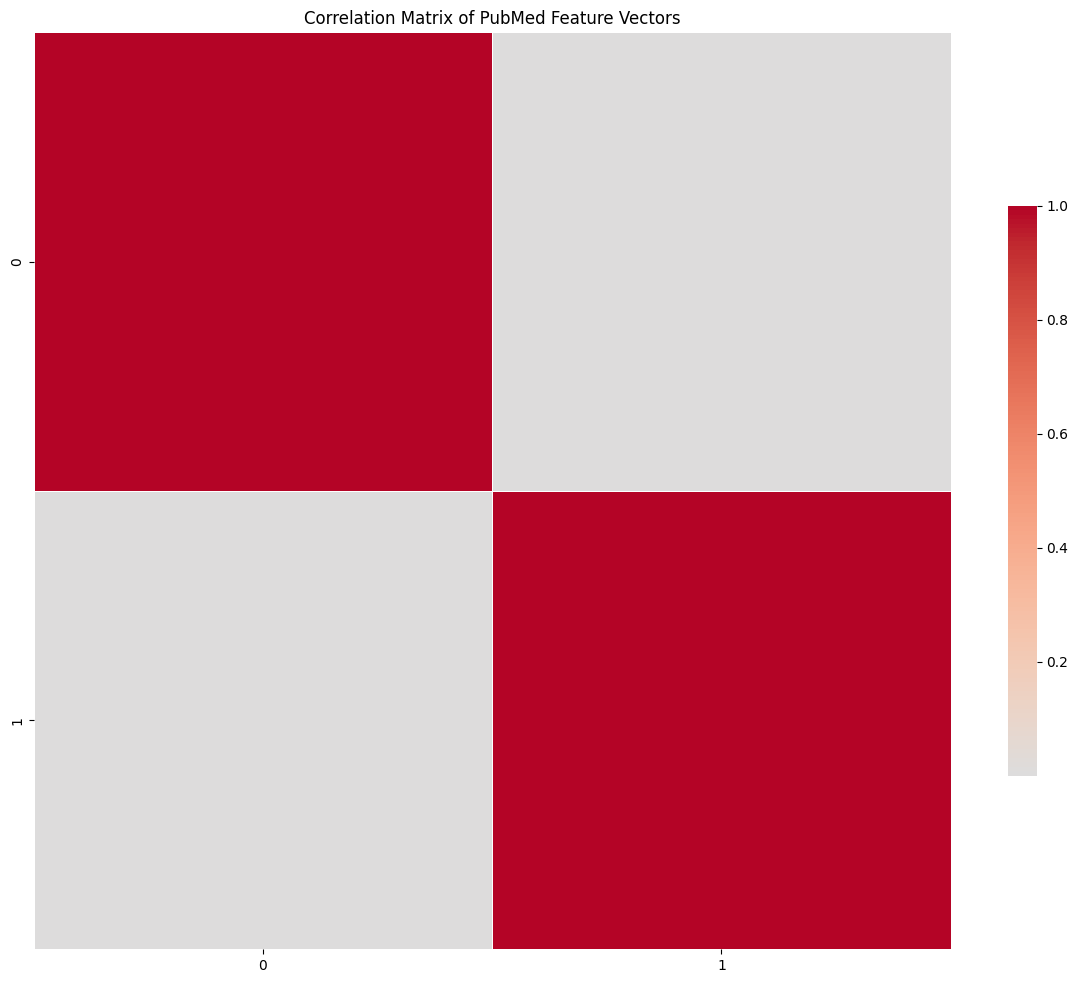

In [ ]:
  # Shape: (num_nodes, num_features)
df = pd.DataFrame(features_pca)
df
# Compute correlation matrix
corr_matrix = df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .6})
plt.title("Correlation Matrix of PubMed Feature Vectors")
plt.tight_layout()
plt.show()

**Cora Dataset**

In [ ]:
def dataset_load():
    print(f"Using device: {device}")
    dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
    data = dataset[0].to(device)
    return dataset.num_features, data, dataset.num_classes

num_features, data, num_classes = dataset_load()

Using device: cuda


Processing...
Done!


In [ ]:
features = data.x.cpu().numpy()  # Shape: (num_nodes, num_features)
df = pd.DataFrame(features)

df

,0,1,2,3,4,5,6,7,8,9,...,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.055556,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.000000,0.000000,0.0,0.043478,0.0,0.0,0.0,0.0,...,0.0,0.0,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2704,0.0,0.0,0.111111,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2705,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2706,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


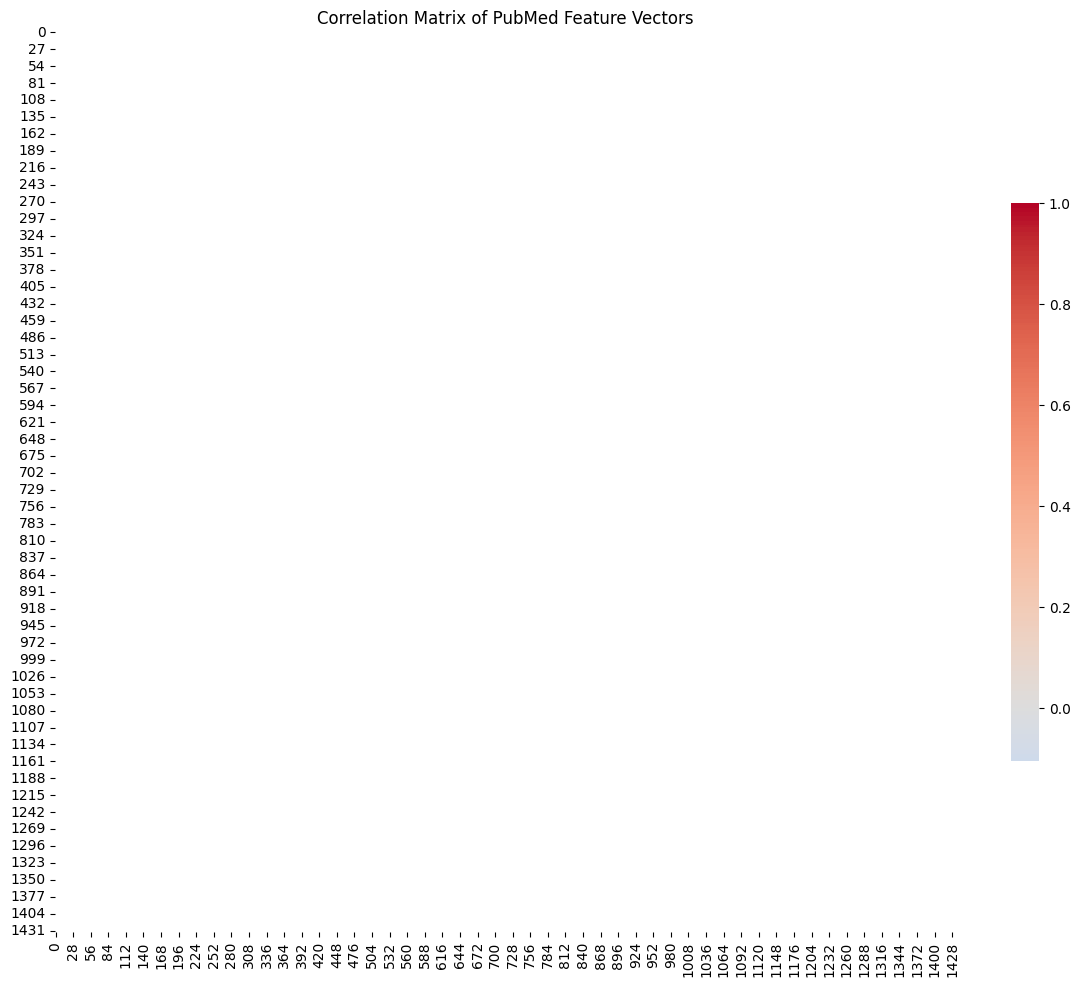

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .6})
plt.title("Correlation Matrix of PubMed Feature Vectors")
plt.tight_layout()
plt.show()

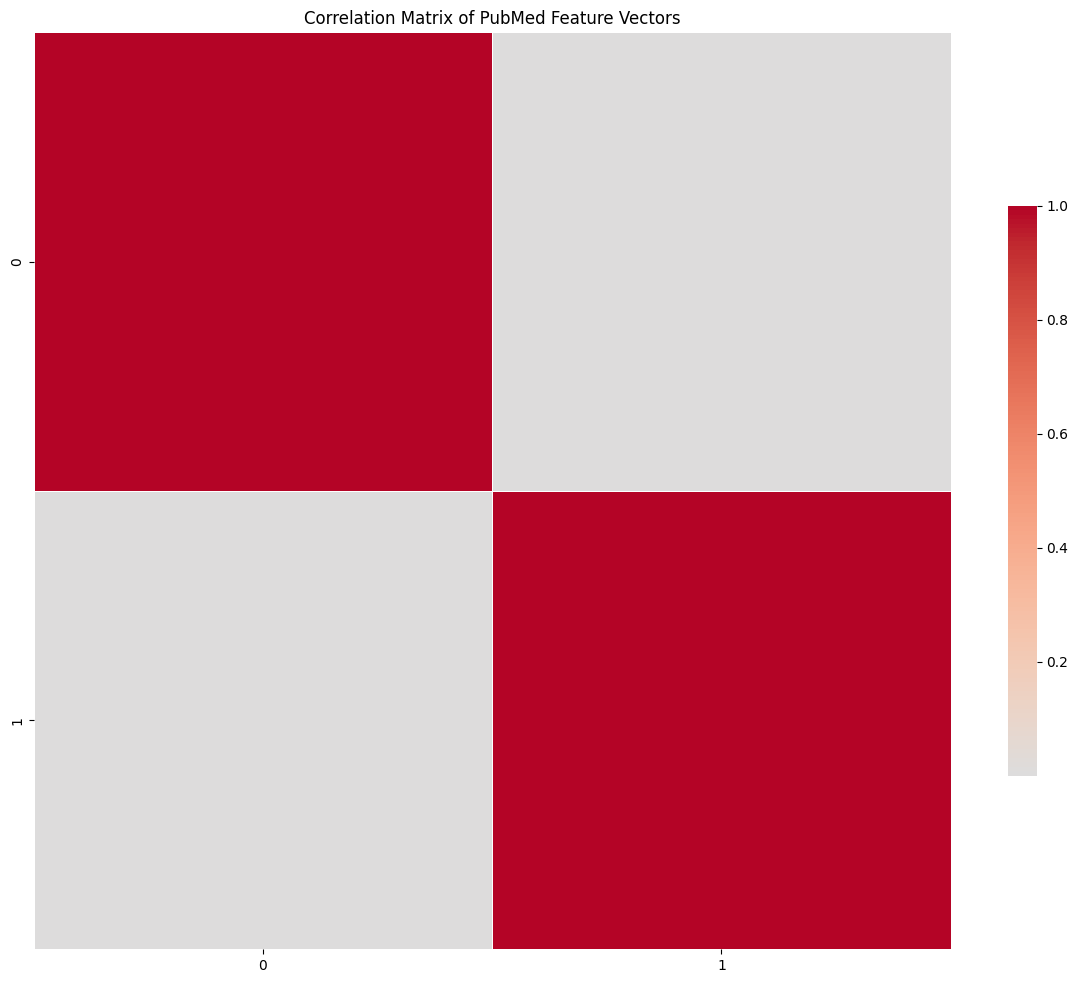

In [ ]:
features = data.x.cpu().numpy()
pca = PCA(n_components=2)
features_pca2 = pca.fit_transform(features)

features_pca2
df = pd.DataFrame(features_pca2)

corr_matrix = df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .6})
plt.title("Correlation Matrix of PubMed Feature Vectors")
plt.tight_layout()
plt.show()

**amazon dataset**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load Amazon Computers dataset
def dataset_load():
    print(f"Using device: {device}")
    dataset = Amazon(root='data/Amazon', name='Computers', transform=NormalizeFeatures())
    data = dataset[0].to(device)
    return dataset.num_features, data, dataset.num_classes

num_features, data, num_classes = dataset_load()

Using device: cuda


Processing...
Done!


In [ ]:
features = data.x.cpu().numpy()  # Shape: (num_nodes, num_features)
df = pd.DataFrame(features)

df

,0,1,2,3,4,5,6,7,8,9,...,757,758,759,760,761,762,763,764,765,766
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002160,0.002160,0.0,0.002160,0.002160,0.002160,0.000000,0.000000,0.002160,0.000000,...,0.002160,0.0,0.000000,0.002160,0.000000,0.002160,0.002160,0.000000,0.002160,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.006211,0.000000,0.006211,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.006211,0.000000,0.000000,0.000000
3,0.000000,0.001792,0.0,0.001792,0.000000,0.001792,0.001792,0.000000,0.000000,0.000000,...,0.000000,0.0,0.001792,0.001792,0.001792,0.001792,0.001792,0.001792,0.001792,0.001792
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004237,0.004237,0.000000,0.004237,...,0.000000,0.0,0.004237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13747,0.000000,0.000000,0.0,0.000000,0.003831,0.000000,0.003831,0.000000,0.000000,0.003831,...,0.000000,0.0,0.003831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13748,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009259,0.0,0.000000,0.009259,0.000000,0.000000,0.009259,0.000000,0.000000,0.000000
13749,0.002488,0.000000,0.0,0.000000,0.002488,0.000000,0.002488,0.002488,0.002488,0.002488,...,0.000000,0.0,0.002488,0.002488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13750,0.006711,0.000000,0.0,0.006711,0.000000,0.000000,0.006711,0.006711,0.006711,0.000000,...,0.000000,0.0,0.000000,0.006711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


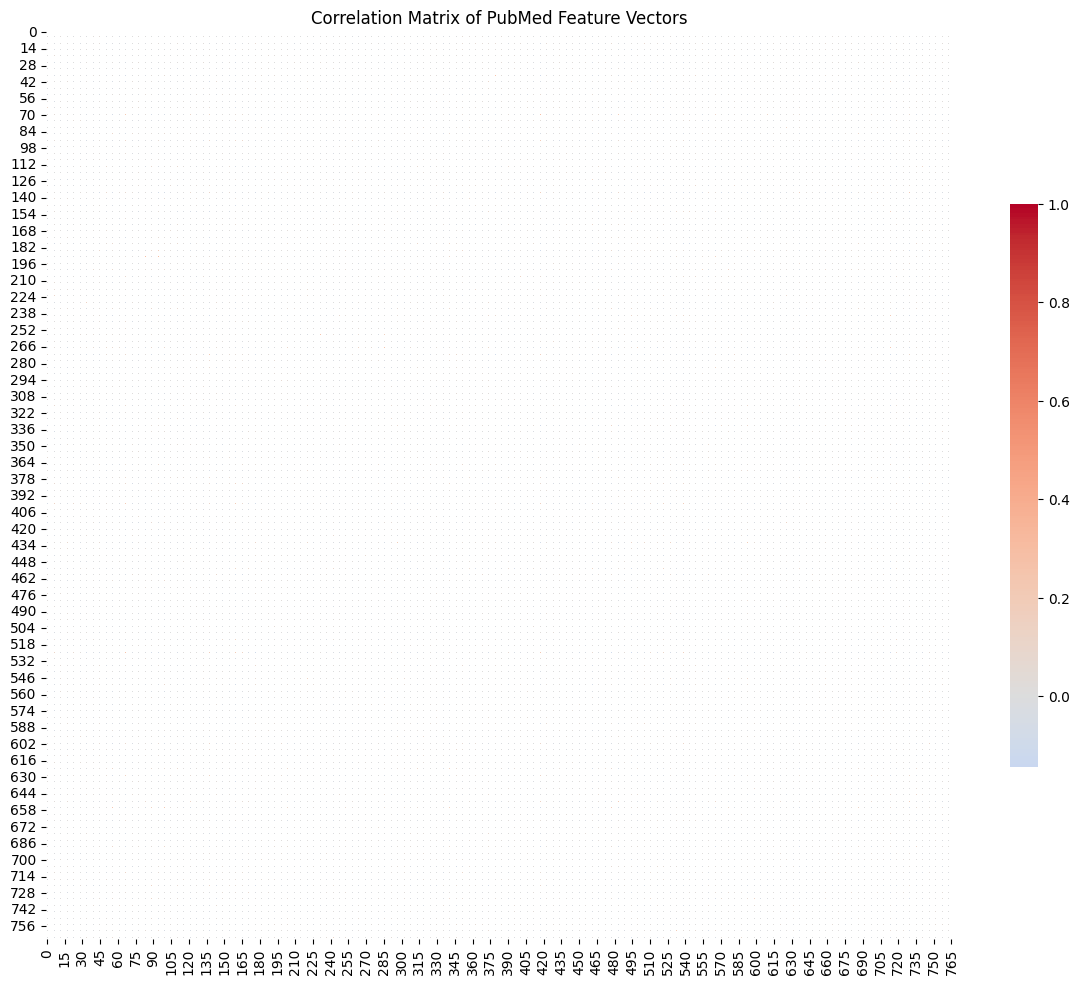

In [ ]:
features = data.x.cpu().numpy()  # Shape: (num_nodes, num_features)
df = pd.DataFrame(features)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .6})
plt.title("Correlation Matrix of PubMed Feature Vectors")
plt.tight_layout()
plt.show()

In [1]:
!unzip results.zip



Archive:  results.zip
   creating: Amazon/
  inflating: Amazon/graphSAINT_rw_amazon_results.json  
  inflating: Amazon/graphSAGE_amazon_results.json  
  inflating: Amazon/clusterGCN_Amazon_results.json  
  inflating: Amazon/fastGCN_amazon_results.json  
  inflating: Amazon/GCN_full_batch_Amazon_results.json  
   creating: CiteSeer/
  inflating: CiteSeer/Ladies_citeser_results.json  
  inflating: CiteSeer/graphSAINT_rw_CiteSeer_results.json  
  inflating: CiteSeer/graphSAGE_citeeser_results.json  
  inflating: CiteSeer/clusterGCN_CiteSeer_results.json  
  inflating: CiteSeer/fastGCN_Citeser_results.json  
  inflating: CiteSeer/GCN_full_batch_citeseer_results.json  
   creating: cora/
  inflating: cora/Ladies_cora_results.json  
  inflating: cora/graphSAINT_rw_Cora_results.json  
  inflating: cora/graphSAGE_cora_results.json  
  inflating: cora/clusterGCN_Cora_results.json  
  inflating: cora/fastGCN_Cora_results.json  
  inflating: cora/GCN_full_batch_cora_results.json  
   creating: pu

In [21]:
import os
import json
import pandas as pd
from google.colab import files
 # then upload zipped folders
def load_results(base_path='/content/'):
    results = []
    for dataset in ['pubmed', 'cora', 'CiteSeer', 'Amazon']:
        dataset_path = os.path.join(base_path, dataset)
        for filename in os.listdir(dataset_path):
            if filename.endswith('.json'):
                with open(os.path.join(dataset_path, filename), 'r') as f:
                    data = json.load(f)
                    data['dataset'] = dataset
                    results.append(data)
    return pd.DataFrame(results)

df = load_results()
df

,model,accuracy,f1_micro,peak_memory_MB,train_time_sec,embedding_storage,Weight_Matrices,mem_MB,dataset
0,graphSAGE,0.712000,0.712000,303.26,1.41,3.125000e-01,1.384277e-01,0.450928,pubmed
1,graphSAINT,0.863000,0.863000,135.39,2.31,NaN,NaN,135.39,pubmed
2,Ladies,0.745000,0.770000,83.03,2.21,NaN,NaN,0.0625,pubmed
3,clusterGCN,0.765000,0.765000,121.53,11.36,NaN,NaN,121.53,pubmed
4,fastGCN,0.413000,0.413000,72.17,2.58,NaN,NaN,0.009766,pubmed
5,GCN_full_batch,0.765000,0.765000,56.31,1.77,7.886800e+07,2.000000e+06,80.9,pubmed
6,GCN_full_batch,0.790000,0.790000,82.01,1.10,3.104451e+07,1.642791e+07,47.5,cora
7,clusterGCN,0.796000,0.796000,71.18,8.07,NaN,NaN,71.18,cora
8,graphSAGE,0.719000,0.719000,162.64,1.89,3.125000e-01,3.671875e-01,0.679688,cora
9,fastGCN,0.319000,0.319000,77.22,0.74,NaN,NaN,0.009766,cora


In [22]:
for col in df.columns:
    if col != 'model' and col != 'dataset' and not pd.api.types.is_float_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              23 non-null     object 
 1   accuracy           23 non-null     float64
 2   f1_micro           23 non-null     float64
 3   peak_memory_MB     23 non-null     float64
 4   train_time_sec     23 non-null     float64
 5   embedding_storage  8 non-null      float64
 6   Weight_Matrices    8 non-null      float64
 7   mem_MB             23 non-null     float64
 8   dataset            23 non-null     object 
dtypes: float64(7), object(2)
memory usage: 1.7+ KB


In [23]:
df

,model,accuracy,f1_micro,peak_memory_MB,train_time_sec,embedding_storage,Weight_Matrices,mem_MB,dataset
0,graphSAGE,0.712000,0.712000,303.26,1.41,3.125000e-01,1.384277e-01,0.450928,pubmed
1,graphSAINT,0.863000,0.863000,135.39,2.31,NaN,NaN,135.390000,pubmed
2,Ladies,0.745000,0.770000,83.03,2.21,NaN,NaN,0.062500,pubmed
3,clusterGCN,0.765000,0.765000,121.53,11.36,NaN,NaN,121.530000,pubmed
4,fastGCN,0.413000,0.413000,72.17,2.58,NaN,NaN,0.009766,pubmed
5,GCN_full_batch,0.765000,0.765000,56.31,1.77,7.886800e+07,2.000000e+06,80.900000,pubmed
6,GCN_full_batch,0.790000,0.790000,82.01,1.10,3.104451e+07,1.642791e+07,47.500000,cora
7,clusterGCN,0.796000,0.796000,71.18,8.07,NaN,NaN,71.180000,cora
8,graphSAGE,0.719000,0.719000,162.64,1.89,3.125000e-01,3.671875e-01,0.679688,cora
9,fastGCN,0.319000,0.319000,77.22,0.74,NaN,NaN,0.009766,cora


In [24]:
df['accuracy'] = df['accuracy'].astype(float)
df['f1_micro'] = df['f1_micro'].astype(float)
df['peak_memory_MB'] = df['peak_memory_MB'].astype(float)
df['train_time_sec'] = df['train_time_sec'].astype(float)
df['mem_MB'] = df['mem_MB'].astype(float)


In [25]:
df

,model,accuracy,f1_micro,peak_memory_MB,train_time_sec,embedding_storage,Weight_Matrices,mem_MB,dataset
0,graphSAGE,0.712000,0.712000,303.26,1.41,3.125000e-01,1.384277e-01,0.450928,pubmed
1,graphSAINT,0.863000,0.863000,135.39,2.31,NaN,NaN,135.390000,pubmed
2,Ladies,0.745000,0.770000,83.03,2.21,NaN,NaN,0.062500,pubmed
3,clusterGCN,0.765000,0.765000,121.53,11.36,NaN,NaN,121.530000,pubmed
4,fastGCN,0.413000,0.413000,72.17,2.58,NaN,NaN,0.009766,pubmed
5,GCN_full_batch,0.765000,0.765000,56.31,1.77,7.886800e+07,2.000000e+06,80.900000,pubmed
6,GCN_full_batch,0.790000,0.790000,82.01,1.10,3.104451e+07,1.642791e+07,47.500000,cora
7,clusterGCN,0.796000,0.796000,71.18,8.07,NaN,NaN,71.180000,cora
8,graphSAGE,0.719000,0.719000,162.64,1.89,3.125000e-01,3.671875e-01,0.679688,cora
9,fastGCN,0.319000,0.319000,77.22,0.74,NaN,NaN,0.009766,cora


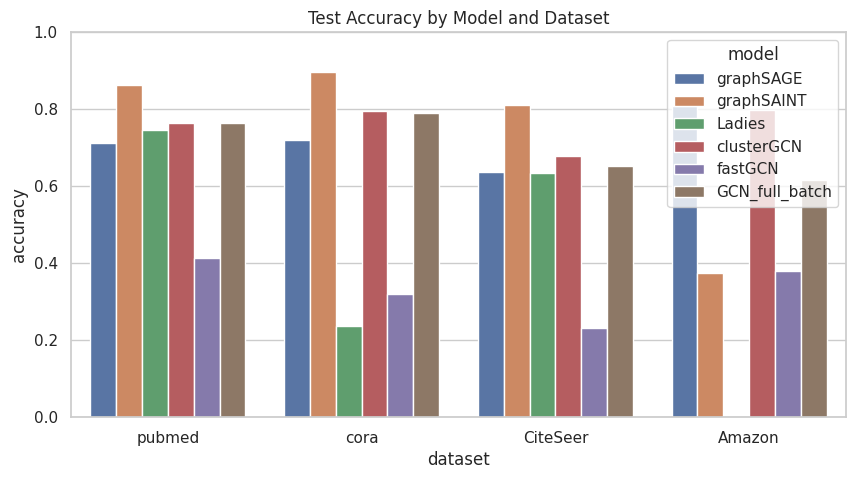

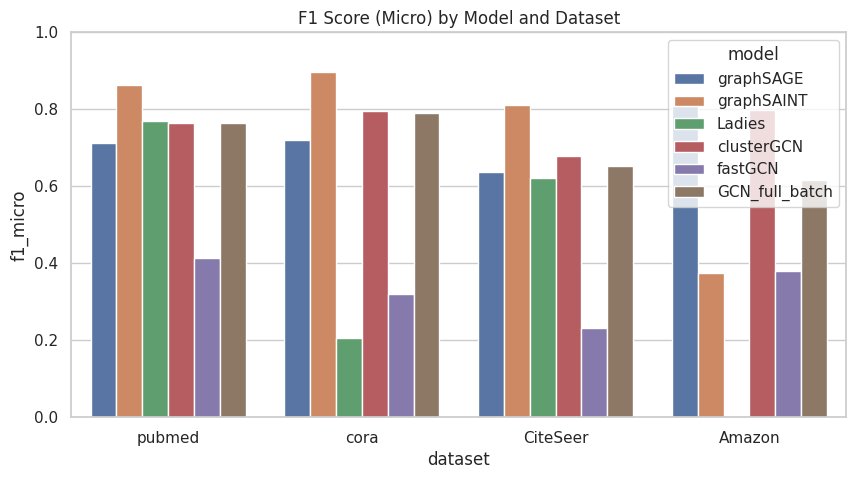

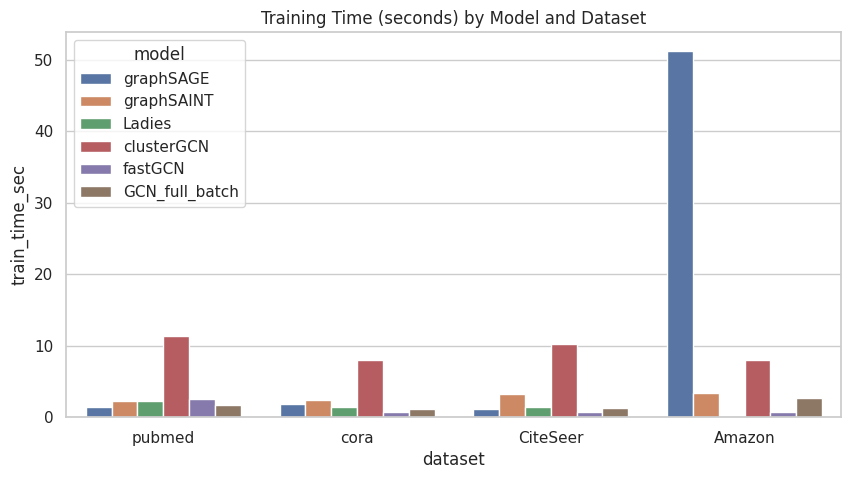

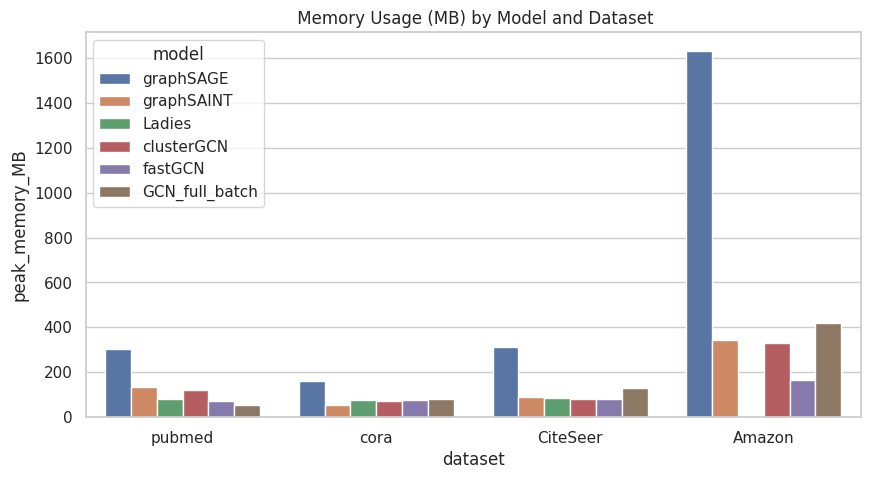

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="dataset", y="accuracy", hue="model")
plt.title("Test Accuracy by Model and Dataset")
plt.ylim(0, 1)
plt.show()

# F1 Micro comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="dataset", y="f1_micro", hue="model")
plt.title("F1 Score (Micro) by Model and Dataset")
plt.ylim(0, 1)
plt.show()

# Training Time
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="dataset", y="train_time_sec", hue="model")
plt.title("Training Time (seconds) by Model and Dataset")
plt.show()

# Peak Memory
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="dataset", y="peak_memory_MB", hue="model")
plt.title(" Memory Usage (MB) by Model and Dataset")
plt.show()




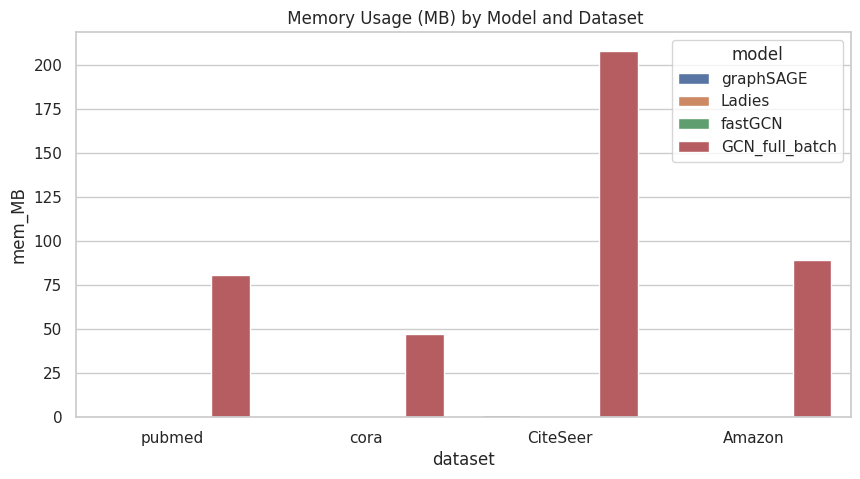

In [27]:

df2 = df[~df['model'].isin(['clusterGCN', 'graphSAINT'])]
df2

# Memory usage
plt.figure(figsize=(10, 5))
sns.barplot(data=df2, x="dataset", y="mem_MB", hue="model")
plt.title(" Memory Usage (MB) by Model and Dataset")
plt.show()

In [ ]:
# Aggregate mean metrics for each model and dataset
summary_table = df2.groupby(['dataset', 'model']).agg({
    'accuracy': ['mean', 'std'],
    'f1_micro': ['mean', 'std'],
    'peak_memory_MB': ['mean', 'std'],
    'train_time_sec': ['mean', 'std'],
    'mem_MB': ['mean', 'std']
}).round(4)

# Flatten multi-index columns for readability
summary_table.columns = ['_'.join(col) for col in summary_table.columns]
summary_table = summary_table.reset_index()

summary_table


,dataset,model,accuracy_mean,accuracy_std,f1_micro_mean,f1_micro_std,peak_memory_MB_mean,peak_memory_MB_std,train_time_sec_mean,train_time_sec_std,mem_MB_mean,mem_MB_std
0,Amazon,fastGCN,0.3549,NaN,0.3549,NaN,143.74,NaN,1.69,NaN,0.0098,NaN
1,Amazon,graphSAGE,0.8087,NaN,0.8087,NaN,1632.20,NaN,51.27,NaN,0.5178,NaN
2,CiteSeer,Ladies,0.6340,NaN,0.6220,NaN,86.30,NaN,1.39,NaN,0.0625,NaN
3,CiteSeer,fastGCN,0.2310,NaN,0.2310,NaN,121.90,NaN,1.54,NaN,0.0098,NaN
4,CiteSeer,graphSAGE,0.6370,NaN,0.6370,NaN,311.22,NaN,1.16,NaN,1.2336,NaN
5,cora,Ladies,0.2380,NaN,0.2060,NaN,75.76,NaN,1.38,NaN,0.0625,NaN
6,cora,fastGCN,0.3190,NaN,0.3190,NaN,77.95,NaN,2.12,NaN,0.0098,NaN
7,cora,graphSAGE,0.7190,NaN,0.7190,NaN,162.64,NaN,1.89,NaN,0.6797,NaN
8,pubmed,Ladies,0.7450,NaN,0.7700,NaN,83.03,NaN,2.21,NaN,0.0625,NaN
9,pubmed,fastGCN,0.4070,NaN,0.4070,NaN,64.50,NaN,1.41,NaN,0.0098,NaN


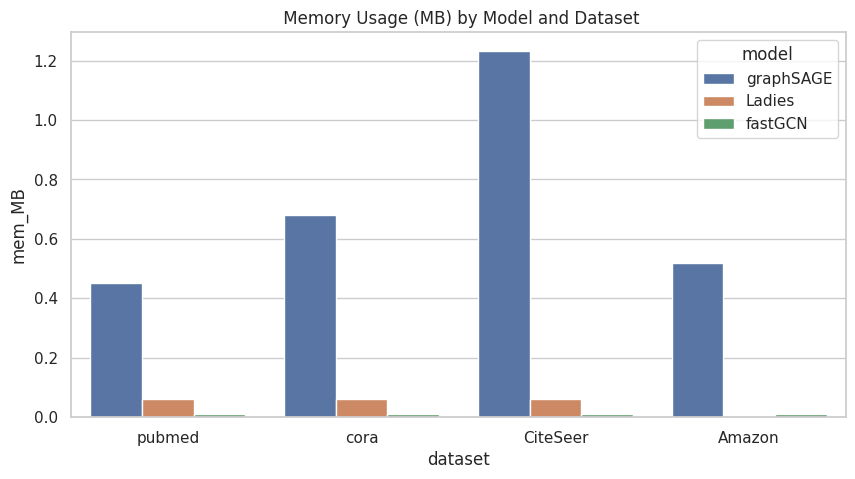

In [28]:

df2 = df[~df['model'].isin(['clusterGCN', 'graphSAINT','GCN_full_batch'])]
df2

# Memory usage
plt.figure(figsize=(10, 5))
sns.barplot(data=df2, x="dataset", y="mem_MB", hue="model")
plt.title(" Memory Usage (MB) by Model and Dataset")
plt.show()